In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


# Load the data
train = pd.read_csv('../../data/train.tsv', sep='\t')
test = pd.read_csv('../../data/test.tsv', sep='\t')
train.shape

/home/zhecan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/zhecan/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(156060, 4)

In [2]:
def split_into_lemmas(message):
    message = unicode(message, 'utf8').lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

lemma_phrase = []
for phrase in train.Phrase:
    lemma_phrase.append(' '.join(split_into_lemmas(phrase)))

L = CountVectorizer(stop_words='english').fit_transform(lemma_phrase)
# bow_transformer = CountVectorizer(stop_words='english', analyzer=split_into_lemmas)
# L = bow_transformer.fit_transform(train.Phrase)
print L.shape
# print len(bow_transformer.vocabulary_)

X = CountVectorizer(stop_words='english').fit_transform(train.Phrase)
print X.shape

# s = set()
# for phrase in train.Phrase:
#     lemmas = split_into_lemmas(phrase)
#     s |= set(lemmas)
    
# print len(s)

# s = set()
# for phrase in train.Phrase:
#     s |= set(phrase.lower().split())
    
# print len(s)

# print train.Phrase[0]
# print split_into_lemmas(train.Phrase[0])

(156060, 13644)
(156060, 14956)


In [4]:
print len(train.Phrase)

156060


trial number: 0
trial number: 1
trial number: 2
trial number: 3
trial number: 4
trial number: 5
trial number: 6
trial number: 7
trial number: 8
trial number: 9
trial number: 10
trial number: 11
trial number: 12
trial number: 13
trial number: 14
trial number: 15
trial number: 16
trial number: 17
trial number: 18
trial number: 19


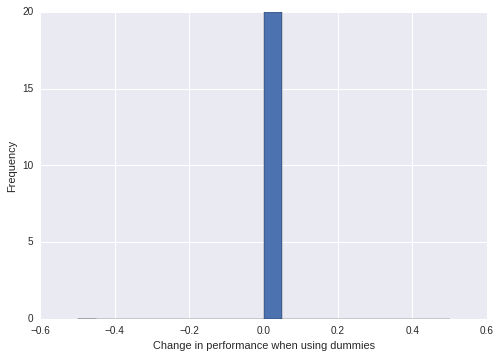

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import sys



def do_trial(X1, y1, X2, y2):
    alg = RandomForestClassifier(n_estimators=50, max_depth = 3)
    # change Shuffle to False to see how this affects the conclusions
    cv = cross_validation.StratifiedKFold(y1, 3, shuffle=True)
    
    score1 = cross_validation.cross_val_score(alg, X1, y1, cv=cv)
    score2 = cross_validation.cross_val_score(alg, X2, y2, cv=cv)
    return score1.mean() - score2.mean()

results = []
n_trials = 20
for i in range(n_trials):
    print "trial number: %d" % i
    sys.stdout.flush()
    results.append(do_trial(X, train.Sentiment, L, train.Sentiment))
    
plt.hist(results, bins=20)
plt.xlabel('Change in performance when using dummies')
plt.ylabel('Frequency')
plt.show()